# **Predicting Diamond Prices in USD Using Machine Learning Regression Models**

## **Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

## **Importing Dataset**

In [2]:
data = pd.read_csv('/kaggle/input/dmddata/diamonds.csv')

In [3]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## **Checking for null values and Noises**

In [6]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**Checking for outliers**

## **Taking X and Y values**

In [7]:
x = data[['carat','cut','color','clarity','depth','table','x','y','z']]
y = data['price']

## **Splitting Training and Testing Data**

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

## **Transforming categorical columns into numerical**

using OneHotEncoding and Ordinal Encoding in different cases on the categorical columns

There are three categorical columns : 'carat','cut','color'

### Applying Ordinal Encoding

In [9]:
#defining order from lowest to highest quality for cut and clarity
ordr_cut = ['Fair','Good','Very Good','Premium','Ideal']
ordr_clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

ord_encd_cut = OrdinalEncoder(categories=[ordr_cut])
ord_encd_clarity = OrdinalEncoder(categories= [ordr_clarity])

In [10]:
x_train['cut'] = ord_encd_cut.fit_transform(x_train[['cut']])
x_test['cut'] = ord_encd_cut.transform(x_test[['cut']])

x_train['clarity'] = ord_encd_clarity.fit_transform(x_train[['clarity']])
x_test['clarity'] = ord_encd_clarity.transform(x_test[['clarity']])

### Applying OneHotEncoding

applying on the color column

In [11]:
ord_encd = OneHotEncoder(sparse_output=False)

In [12]:
color_data_xtr = pd.DataFrame(data = ord_encd.fit_transform(x_train[['color']]), columns = ord_encd.get_feature_names_out(), index = x_train.index)

In [13]:
color_data_xtr

,color_D,color_E,color_F,color_G,color_H,color_I,color_J
19497,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31229,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22311,0.0,1.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6646,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
11284,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44732,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,0.0,1.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
color_data_xts = pd.DataFrame(data = ord_encd.transform(x_test[['color']]), columns = ord_encd.get_feature_names_out(), index = x_test.index)

In [15]:
color_data_xts

,color_D,color_E,color_F,color_G,color_H,color_I,color_J
1388,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50052,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41645,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42377,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17244,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
29577,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12564,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24786,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1332,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
x_train_en = pd.concat([x_train.drop('color',axis=1),color_data_xtr],axis=1)

In [17]:
x_train_en

,carat,cut,clarity,depth,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
19497,1.21,4.0,5.0,61.3,57.0,6.92,6.87,4.23,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31229,0.31,4.0,3.0,62.0,56.0,4.38,4.36,2.71,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22311,1.21,4.0,4.0,62.4,57.0,6.75,6.83,4.24,0.0,1.0,0.0,0.0,0.0,0.0,0.0
278,0.81,4.0,1.0,62.6,55.0,5.92,5.96,3.72,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6646,0.79,4.0,5.0,61.7,56.0,5.94,5.95,3.67,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.05,2.0,3.0,62.4,59.0,6.48,6.51,4.05,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44732,0.47,4.0,4.0,61.0,55.0,5.03,5.01,3.06,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.33,2.0,7.0,60.3,58.0,4.49,4.46,2.70,0.0,0.0,1.0,0.0,0.0,0.0,0.0
860,0.90,3.0,2.0,62.8,59.0,6.13,6.03,3.82,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
x_test_en = pd.concat([x_test.drop('color',axis=1),color_data_xts],axis=1)

In [19]:
x_test_en

,carat,cut,clarity,depth,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
1388,0.24,4.0,6.0,62.1,56.0,3.97,4.00,2.47,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50052,0.58,2.0,5.0,60.0,57.0,5.44,5.42,3.26,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41645,0.40,4.0,5.0,62.1,55.0,4.76,4.74,2.95,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42377,0.43,3.0,5.0,60.8,57.0,4.92,4.89,2.98,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17244,1.55,4.0,1.0,62.3,55.0,7.44,7.37,4.61,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29577,0.41,3.0,2.0,61.2,59.0,4.78,4.82,2.94,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12564,1.06,4.0,2.0,63.0,55.0,6.49,6.44,4.08,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24786,1.51,3.0,3.0,60.8,60.0,7.42,7.38,4.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1332,0.71,1.0,5.0,58.9,61.0,5.80,5.90,3.44,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Applying Standard Scaling

In [20]:
mns  = StandardScaler()

In [21]:
x_tr_scl = mns.fit_transform(x_train_en)

In [22]:
x_ts_scl = mns.transform(x_test_en)

Converting scaled data into DataFrame

In [23]:
x_train_scl = pd.DataFrame(data= x_tr_scl,index =x_train.index, columns = mns.get_feature_names_out())

In [24]:
x_train_scl

,carat,cut,clarity,depth,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
19497,0.862659,0.982948,1.184867,-0.311437,-0.207099,1.055581,0.986556,0.968253,-0.378205,-0.470813,-0.465474,-0.511867,2.329335,-0.333294,-0.234494
31229,-1.029889,0.982948,-0.030994,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,-0.378205,2.123985,-0.465474,-0.511867,-0.429307,-0.333294,-0.234494
22311,0.862659,0.982948,0.576936,0.458541,-0.207099,0.904099,0.951670,0.982309,-0.378205,2.123985,-0.465474,-0.511867,-0.429307,-0.333294,-0.234494
278,0.021527,0.982948,-1.246854,0.598537,-1.105327,0.164512,0.192898,0.251391,-0.378205,-0.470813,2.148350,-0.511867,-0.429307,-0.333294,-0.234494
6646,-0.020530,0.982948,1.184867,-0.031445,-0.656213,0.182333,0.184176,0.181110,-0.378205,-0.470813,-0.465474,-0.511867,-0.429307,3.000353,-0.234494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.526206,-0.810396,-0.030994,0.458541,0.691128,0.663511,0.672581,0.715243,-0.378205,-0.470813,-0.465474,-0.511867,-0.429307,3.000353,-0.234494
44732,-0.693436,0.982948,0.576936,-0.521432,-1.105327,-0.628540,-0.635646,-0.676312,2.644071,-0.470813,-0.465474,-0.511867,-0.429307,-0.333294,-0.234494
38158,-0.987832,-0.810396,2.400727,-1.011418,0.242014,-1.109717,-1.115329,-1.182333,-0.378205,-0.470813,2.148350,-0.511867,-0.429307,-0.333294,-0.234494
860,0.210782,0.086276,-0.638924,0.738533,0.691128,0.351636,0.253949,0.391952,-0.378205,-0.470813,-0.465474,-0.511867,-0.429307,-0.333294,4.264502


In [25]:
x_test_scl = pd.DataFrame(data= x_ts_scl,index =x_test.index, columns = mns.get_feature_names_out())

In [26]:
x_test_scl

,carat,cut,clarity,depth,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
1388,-1.177087,0.982948,1.792797,0.248547,-0.656213,-1.573073,-1.516519,-1.505623,-0.378205,-0.470813,-0.465474,1.953634,-0.429307,-0.333294,-0.234494
50052,-0.462124,-0.810396,1.184867,-1.221412,-0.207099,-0.263201,-0.278064,-0.395190,-0.378205,-0.470813,2.148350,-0.511867,-0.429307,-0.333294,-0.234494
41645,-0.840634,0.982948,1.184867,0.248547,-1.105327,-0.869128,-0.871127,-0.830930,-0.378205,2.123985,-0.465474,-0.511867,-0.429307,-0.333294,-0.234494
42377,-0.777549,0.086276,1.184867,-0.661428,-0.207099,-0.726557,-0.740304,-0.788761,-0.378205,2.123985,-0.465474,-0.511867,-0.429307,-0.333294,-0.234494
17244,1.577621,0.982948,-1.246854,0.388543,-1.105327,1.518937,1.422631,1.502385,-0.378205,2.123985,-0.465474,-0.511867,-0.429307,-0.333294,-0.234494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29577,-0.819606,0.086276,-0.638924,-0.381435,0.691128,-0.851307,-0.801355,-0.844986,-0.378205,2.123985,-0.465474,-0.511867,-0.429307,-0.333294,-0.234494
12564,0.547234,0.982948,-0.638924,0.878529,-1.105327,0.672421,0.611531,0.757411,-0.378205,-0.470813,-0.465474,-0.511867,2.329335,-0.333294,-0.234494
24786,1.493508,0.086276,-0.030994,-0.661428,1.140242,1.501116,1.431353,1.347768,-0.378205,-0.470813,-0.465474,1.953634,-0.429307,-0.333294,-0.234494
1332,-0.188756,-1.707069,1.184867,-1.991391,1.589356,0.057584,0.140569,-0.142180,-0.378205,-0.470813,2.148350,-0.511867,-0.429307,-0.333294,-0.234494


Checking Correlation of the features

In [27]:
dt = pd.concat([x_train_scl,y_train],axis=1)

In [28]:
xtr_correlat = dt.corr()

In [29]:
dt.corr()

,carat,cut,clarity,depth,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J,price
carat,1.000000,-0.136568,-0.350362,0.033516,0.177176,0.974924,0.949135,0.946185,-0.112849,-0.140076,-0.060286,-0.028583,0.106264,0.160014,0.177528,0.921729
cut,-0.136568,1.000000,0.186414,-0.214318,-0.433403,-0.126851,-0.122766,-0.149410,0.006505,-0.003624,-0.010182,0.044982,-0.010326,-0.007582,-0.040882,-0.056111
clarity,-0.350362,0.186414,1.000000,-0.066339,-0.155481,-0.368885,-0.355089,-0.360349,-0.087195,-0.020775,0.025680,0.125891,-0.026187,-0.018811,-0.040009,-0.145087
depth,0.033516,-0.214318,-0.066339,1.000000,-0.297302,-0.021104,-0.026131,0.098415,-0.014689,-0.030424,-0.016435,0.004555,0.022826,0.025142,0.023436,-0.004225
table,0.177176,-0.433403,-0.155481,-0.297302,1.000000,0.192339,0.180855,0.146346,-0.011386,0.005645,-0.004820,-0.041267,0.015901,0.017897,0.040675,0.122367
x,0.974924,-0.126851,-0.368885,-0.021104,0.192339,1.000000,0.971878,0.963348,-0.106779,-0.135064,-0.047516,-0.023867,0.098179,0.145094,0.162539,0.884821
y,0.949135,-0.122766,-0.355089,-0.026131,0.180855,0.971878,1.000000,0.942313,-0.104163,-0.131444,-0.045905,-0.023714,0.096236,0.140976,0.158043,0.863298
z,0.946185,-0.149410,-0.360349,0.098415,0.146346,0.963348,0.942313,1.000000,-0.105200,-0.131368,-0.047832,-0.023807,0.095975,0.142821,0.160877,0.855583
color_D,-0.112849,0.006505,-0.087195,-0.014689,-0.011386,-0.106779,-0.104163,-0.105200,1.000000,-0.178064,-0.176044,-0.193590,-0.162366,-0.126053,-0.088687,-0.073932
color_E,-0.140076,-0.003624,-0.020775,-0.030424,0.005645,-0.135064,-0.131444,-0.131368,-0.178064,1.000000,-0.219151,-0.240994,-0.202123,-0.156919,-0.110403,-0.101548


Plotting Correlation using Heatmap

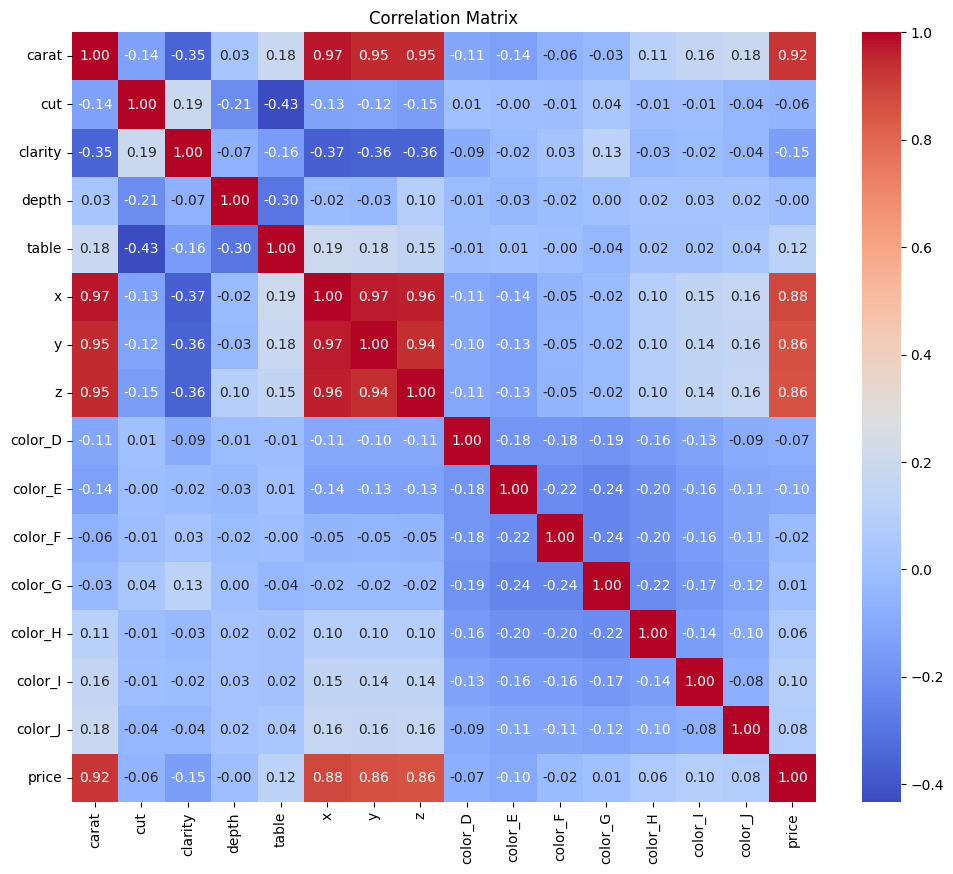

In [30]:
plt.figure(figsize=(12, 10))
sns.heatmap(data= dt.corr(),cmap = 'coolwarm', annot = True,fmt=".2f",annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

## Model Training ,Testing and Evaluating

### Linear Regression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_train_scl,y_train)

LinearRegression()

In [33]:
pred = lr.predict(x_test_scl)

In [34]:
r2_lr = r2_score(y_test,pred)
print('r2 score: ',r2_lr)

mae_lr = mean_absolute_error(y_test,pred)
print('mean absolute error: ',mae_lr)

mse_lr = mean_squared_error(y_test,pred)
print('mean squared error: ',mse_lr)

r2 score:  0.9099709767359678
mean absolute error:  782.0780840754431
mean squared error:  1404089.3478862497


### Ridge Regression

In [35]:
ridg = Ridge()

In [36]:
ridg.fit(x_train_scl,y_train)

Ridge()

In [37]:
rg_pred = ridg.predict(x_test_scl)

In [38]:
r2_ridg = r2_score(y_test,rg_pred)
print('r2_score: ',r2_ridg)
mea_ridg = mean_absolute_error(y_test,rg_pred)
print('Mean Absolute Error: ',mea_ridg)
mse_ridg = mean_squared_error(y_test,rg_pred)
print('Mean Squared error: ',mse_ridg)

r2_score:  0.909969100824733
Mean Absolute Error:  782.1992941081138
Mean Squared error:  1404118.6045291275


### Lasso Regression

In [39]:
ls = Lasso()

In [40]:
ls.fit(x_train_scl,y_train)

Lasso()

In [41]:
ls_pred = ls.predict(x_test_scl)

In [42]:
r2_ls = r2_score(y_test,ls_pred)
print('r2_score: ',r2_ls)
mae_ls = mean_absolute_error(y_test,ls_pred)
print('Mean absolute error: ',mae_ls)
mse_ls = mean_squared_error(y_test,ls_pred)
print('Mean squared error: ',mse_ls)

r2_score:  0.9099317190802446
Mean absolute error:  783.3365199785957
Mean squared error:  1404701.6088463874


### ElasticNet Regression

In [43]:
ENr = ElasticNet()

In [44]:
ENr.fit(x_train_scl,y_train)

ElasticNet()

In [45]:
enr_pred = ENr.predict(x_test_scl)

In [46]:
r2_enr = r2_score(y_test,enr_pred)
print('r2_score: ',r2_enr)
mae_enr = mean_absolute_error(y_test,enr_pred)
print('Mean absolute error: ',mae_enr)
mse_enr = mean_squared_error(y_test,enr_pred)
print('Mean squared error: ',mse_enr)

r2_score:  0.8391083199598108
Mean absolute error:  1060.2075222106291
Mean squared error:  2509260.746342062


### KNearestNeighbor Regressor

In [47]:
knr = KNeighborsRegressor()

In [48]:
knr.fit(x_train_scl,y_train)

KNeighborsRegressor()

In [49]:
knr_pred = ENr.predict(x_test_scl)

In [50]:
r2_knr = r2_score(y_test,enr_pred)
print('r2_score: ',r2_knr)
mae_knr = mean_absolute_error(y_test,enr_pred)
print('Mean absolute error: ',mae_knr)
mse_knr = mean_squared_error(y_test,enr_pred)
print('Mean squared error: ',mse_knr)

r2_score:  0.8391083199598108
Mean absolute error:  1060.2075222106291
Mean squared error:  2509260.746342062


### Decision Tree Regressor

In [51]:
dtr = DecisionTreeRegressor()

In [52]:
dtr.fit(x_train_scl,y_train)

DecisionTreeRegressor()

In [53]:
dtr_pred = dtr.predict(x_test_scl)

In [54]:
r2_dtr = r2_score(y_test,enr_pred)
print('r2_score',r2_dtr)
mae_dtr = mean_absolute_error(y_test,enr_pred)
print('Mean absolute error',mae_dtr)
mse_dtr = mean_squared_error(y_test,enr_pred)
print('Mean squared error',mse_dtr)

r2_score 0.8391083199598108
Mean absolute error 1060.2075222106291
Mean squared error 2509260.746342062


### RandomForest Regressor

In [55]:
rfr = RandomForestRegressor()

In [56]:
rfr.fit(x_train_scl,y_train)

RandomForestRegressor()

In [57]:
p = rfr.predict(x_test_scl)

In [58]:
r2_rfr = r2_score(y_test,p)
print('r2_score: ',r2_rfr)
mae_rfr = mean_absolute_error(y_test,p)
print('Mean absolute error: ',mae_rfr)
mse_rfr = mean_squared_error(y_test,p)
print('Mean squared error: ',mse_rfr)

r2_score:  0.9810297248498759
Mean absolute error:  269.9232760047908
Mean squared error:  295859.7161122586


### AdaBoost Regressor

In [59]:
adr = AdaBoostRegressor()

In [60]:
adr.fit(x_train_scl,y_train)

AdaBoostRegressor()

In [61]:
adr_pred = adr.predict(x_test_scl)

In [62]:
r2_adr = r2_score(y_test,adr_pred) 
print('r2_score: ',r2_adr)
mae_adr = mean_absolute_error(y_test,adr_pred) 
print('Mean absolute error: ',mae_adr)
mse_adr = mean_squared_error(y_test,adr_pred) 
print('Mean squared error: ',mse_adr)

r2_score:  0.9106437832520696
Mean absolute error:  888.0931950886603
Mean squared error:  1393596.2821148203


### Support Vector Regressor

In [63]:
svr = SVR()

In [64]:
svr.fit(x_train_scl,y_train)

SVR()

In [65]:
pred_svr = svr.predict(x_test_scl)

In [66]:
r2_svr = r2_score(y_test,pred_svr)
print('r2_score: ',r2_svr)
mae_svr = mean_absolute_error(y_test,pred_svr)
print('Mean absolute error: ',mae_svr)
mse_svr = mean_squared_error(y_test,pred_svr)
print('Mean squared error: ',mse_svr)

r2_score:  0.42078697407045773
Mean absolute error:  1499.5881770440299
Mean squared error:  9033385.128255008


After evaluating parameters like r2_score, mean_absolute_error, mean_squared_error, we get that RandomForest Regressor performs the best and gives the maximum accuracy of around 98.1 percent 

## Hyperparameter tuning

### Tuning parameters for random forest classifier

In [67]:
import optuna

In [68]:
def objective(trial):

    n_estimators = trial.suggest_int('n_estimators',10,200)
    #criterion = trial.suggest_categorical('criterion',["squared_error", "absolute_error", "friedman_mse", "poisson"])
    max_depth = trial.suggest_int('max_depth',2,20)
    min_samples_split = trial.suggest_int('min_samples_split',2,20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf',1,20)

    rndf = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
    rndf.fit(x_train_scl,y_train)
    rf_p = rndf.predict(x_test_scl)
    accuracy = r2_score(y_test,rf_p)
    
    return accuracy

In [69]:
study_rf = optuna.create_study(direction='maximize')

[I 2024-11-06 17:32:37,115] A new study created in memory with name: no-name-c491bb04-b109-49f3-a121-98bb1b5795a1


In [ ]:
study_rf.optimize(objective,n_trials = 150)

In [ ]:
mse = np.mean((y_test - p)**2)
rmse = np.sqrt(mse_rfr)
std_dev = np.std(y_test)

print(f"RMSE: {rmse}")
print(f"Target Standard Deviation: {std_dev}")

In [ ]:
rn = RandomForestRegressor(n_estimators =178,max_depth = 19,min_samples_split= 9, min_samples_leaf =  1)

In [ ]:
rn.fit(x_train_scl,y_train)

In [ ]:
pp = rn.predict(x_test_scl)

In [ ]:
r2_score(y_test,pp)

In [ ]:
mean_absolute_error(y_test,pp)

In [ ]:
mean_squared_error(y_test,pp)

In [ ]:
new_xtr = pd.DataFrame(data = [[4.43,2.0,4.0,50.8,39.0,33.29,21.89,10.98,0.0,0.0,0.0,0.0,1.0,0.0,0.0]],
                       columns = ['carat','cut','clarity','depth','table','x','y','z','color_D','color_E','color_F','color_G','color_H','color_I','color_J'])

In [ ]:
new_xtr

In [ ]:
new_xts_scl = pd.DataFrame(mns.transform(new_xtr),columns = mns.get_feature_names_out())

In [ ]:
prd = rn.predict(new_xts_scl)

In [ ]:
prd

### Parameter tuning for adaboosting classifier

In [ ]:
aa = AdaBoostRegressor()

In [ ]:
def objec(trial):
    
    n_estimators = trial.suggest_int('n_estimators',10,200)
    learning_rate = trial.suggest_float('learning_rate',1.0,20.0)
    loss = trial.suggest_categorical('loss',['linear', 'square', 'exponential'])
    
    adab = AdaBoostRegressor(n_estimators= n_estimators,learning_rate=learning_rate,loss = loss)
    adab.fit(x_train_scl,y_train)
    ad_pred = adab.predict(x_test_scl)
    
    accuracy = r2_score(y_test,ad_pred)
    
    return accuracy

In [ ]:
study_ada = optuna.create_study(direction='maximize')

In [ ]:
study_ada.optimize(objec,n_trials = 150)

In [ ]:
adar= AdaBoostRegressor(n_estimators = 32,learning_rate = 1.956559418572974, loss ='square')

In [ ]:
adar.fit(x_train_scl,y_train)

In [ ]:
ad_p = adar.predict(x_test_scl)

In [ ]:
r2_score(y_test,ad_p)

## Evaluation Table

**Representing performance if each model**

In [78]:


# Data to populate the table
# Replace these values with the actual metrics you've calculated for each algorithm
results_data = {
    "Algorithm": ["Linear Regression", "Ridge Regression", "Lasso Regression", "ElasticNet Regression",
                  "KNN Regression", "Decision Tree Regression", "Random Forest Regression", "AdaBoost Regression", "Support Vector regression"],
    "R2_Score": [0.909969, 0.909969, 0.90993, 0.839108, 0.839108, 0.839108,  0.981029,  0.9106437, 0.42078],  # Replace with actual R2 scores
    "Mean Absolute Error": [782.07808, 782.19929, 783.336519, 1060.20752, 1060.20752, 1060.20752, 269.923276, 888.093195, 1499.58817],  # Replace with actual MAEs
    "Mean Squared Error": [ 1404089.347886, 1404118.604529, 1404701.608846, 2509260.74634, 2509260.74634, 2509260.74634, 295859.71611, 1393596.28211, 9033385.12825]  # Replace with actual MSEs
}

# Creating DataFrame
results_df = pd.DataFrame(results_data)

# Set the 'Algorithm' column as the index
results_df.set_index("Algorithm", inplace=True)



# Display the table


pd.options.display.float_format = True
results_df

ValueError: Value must be a callable

In [75]:
results_df

,R2_Score,Mean Absolute Error,Mean Squared Error
Algorithm,,,
Linear Regression,0.909969,782.078080,1.404089e+06
Ridge Regression,0.909969,782.199290,1.404119e+06
Lasso Regression,0.909930,783.336519,1.404702e+06
ElasticNet Regression,0.839108,1060.207520,2.509261e+06
KNN Regression,0.839108,1060.207520,2.509261e+06
Decision Tree Regression,0.839108,1060.207520,2.509261e+06
Random Forest Regression,0.981029,269.923276,2.958597e+05
AdaBoost Regression,0.910644,888.093195,1.393596e+06
Support Vector regression,0.420780,1499.588170,9.033385e+06
